In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import measure
import scipy.ndimage as ndi #import the neccerary 
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)

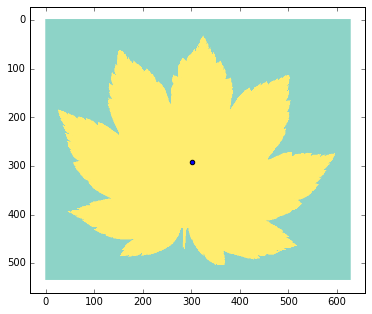

In [2]:
img = mpimg.imread('/home/zzq/leaf/images/9.jpg')
cy, cx = ndi.center_of_mass(img)# using image processing module of scipy to find the center of the leaf
plt.imshow(img, cmap='Set3')  # show me the leaf
plt.scatter(cx, cy)         #以散点图的方式呈现
# show me its center
plt.show()

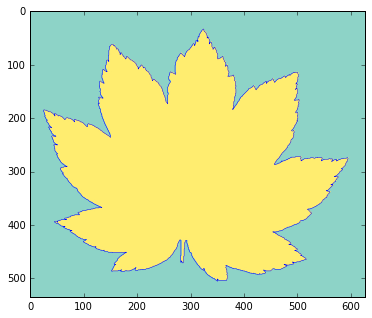

In [3]:
# scikit-learn imaging contour finding, returns a list of found edges
contours = measure.find_contours(img, .8)
contour=max(contours,key=len)#传入的function是长度
# let us see the contour that we hopefully found
plt.plot(contour[::,1], contour[::,0], linewidth=0.5)  # (I will explain this [::,x] later)
plt.imshow(img, cmap='Set3')
plt.show()

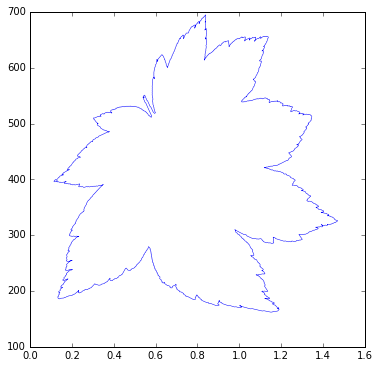

In [4]:
# cartesian to polar coordinates, just as the image shows above
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]
#类似于将图像反转
# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
plt.plot(polar_contour[::,1], polar_contour[::,0], linewidth=0.5)
plt.show()

In [5]:


# numpy is smart and assumes the same about us
# if we substract a number from an array of numbers,
# it assumes that we wanted to substract from all members
contour[::,1] -= cx  # demean X
contour[::,0] -= cy  # demean Y



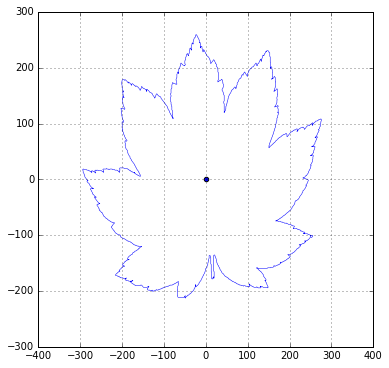

In [6]:
# checking if we succeeded to move the center to (0,0)
plt.plot(-contour[::,1], -contour[::,0], linewidth=0.5)
plt.grid()
plt.scatter(0, 0)
plt.show()

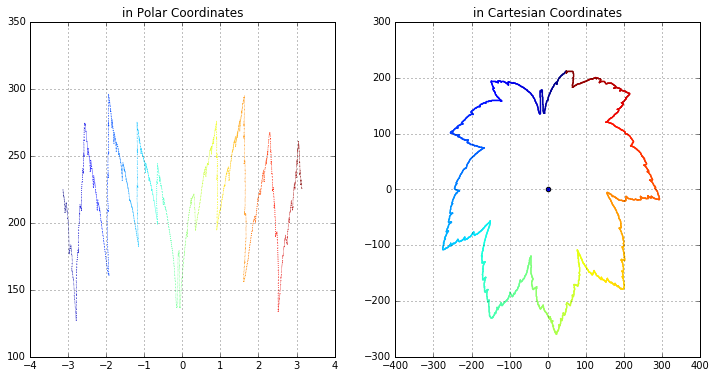

In [7]:
# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
rcParams['figure.figsize'] = (12, 6)
plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], linewidth=0, s=.5, c=polar_contour[::,1])
plt.title('in Polar Coordinates')
plt.grid()
plt.subplot(122)
plt.scatter(contour[::,1],             # x axis is radians
            contour[::,0],             # y axis is distance from center
            linewidth=0, s=2,          # small points, w/o borders
            c=range(len(contour)))     # continuous coloring (so that plots match)
plt.scatter(0, 0)
plt.title('in Cartesian Coordinates')
plt.grid()
plt.show()